In [1]:
%load_ext autoreload
%autoreload 2

from nnet import *
import torch
from torch.autograd import Variable
import torch.nn as nn

In [2]:
net = Net()
net

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [3]:
params = list(net.parameters())
len(params)

10

In [4]:
input = Variable(torch.randn(1, 1, 32, 32))

In [5]:
out = net(input)
out

Variable containing:
-0.0778  0.0585  0.0221 -0.0113  0.0396  0.0079 -0.1377 -0.0532 -0.1136 -0.0705
[torch.FloatTensor of size 1x10]

In [6]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [7]:
target = Variable(torch.arange(1, 11))
target

Variable containing:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
[torch.FloatTensor of size 10]

In [8]:
criterion = nn.MSELoss()
criterion

MSELoss(
)

In [18]:
net = Net()
out = net(input)
loss = criterion(out, target)
loss

Variable containing:
 38.7745
[torch.FloatTensor of size 1]

In [19]:
loss.grad_fn

In [20]:
from vis import make_dot
import vis

{}


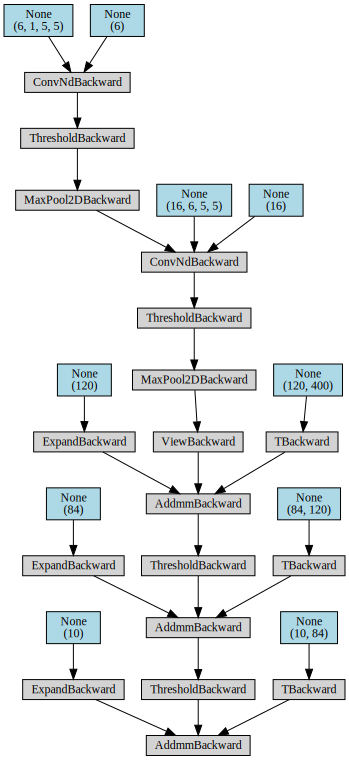

In [21]:
vis.make_dot(out)

{}


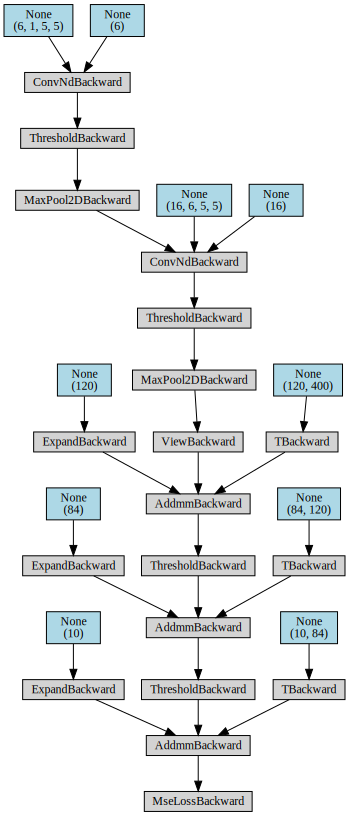

In [22]:
vis.make_dot(loss)

In [23]:
loss.grad_fn

In [24]:
loss.grad_fn.next_functions[0][0]

In [25]:
net.zero_grad()
net.conv1.bias.grad

In [26]:
net.zero_grad()
loss = criterion(out, target)
loss.backward()
net.conv1.bias.grad

Variable containing:
1.00000e-02 *
  4.9042
 -0.5470
  6.2734
 -4.8781
  1.6836
  2.8941
[torch.FloatTensor of size 6]

In [27]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [28]:
import torch.optim as optim

In [29]:
optimizer = optim.SGD(net.parameters(), lr=0.01)

optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()